# Telco Customer Churn

Verizon Team B
---
## Exploratory Data Analysis

1. Import packages
2. Loading data with Pandas
3. Descriptive statistics of data
4. Data visualization
5. Hypothesis investigation

## Modeling
1. Encoding
2. Logistic Regression
3. Decesion Tree
4. Random Forest



---
## Exploratory Data Analysis

---
###1. Import packages

In [412]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---
###2. Loading data with Pandas

In [413]:
#Load customer_data.csv into a dataframe.
dataset_url = "https://raw.githubusercontent.com/pushkarsinha/VerizonTeamB/main/customer_data.csv?token=GHSAT0AAAAAACHDGF6GTB6MNM5QIVHVTUYQZIHFKQQ"
df = pd.read_csv(dataset_url, header=0)

In [414]:
# Displaying the first few rows of the DataFrame to get a quick overview of the data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [415]:
# Display the dimensions (number of rows and columns) of the DataFrame 'df'.
df.shape

(7043, 21)

*We see that the dataset has 7043 examples, with 43 column*

In [416]:
# Print the names of columns in the DataFrame 'df'.
print(df.columns.values)

['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn']


In [417]:
# Check if there are any missing values (NaN) in the DataFrame 'df'.
# Returns True if at least one missing value exists, and False if the DataFrame is free of missing values.
df.isnull().values.any()

False

*Since the output is False, there are no missing values.*

In [418]:
# Find indices of elements in DataFrame 'df' where the condition is True for empty strings ('') using np.where and applymap.
# Resulting tuple (row_indices, column_indices) indicates positions where empty strings are present in 'df'.
np.where(df.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

*Based on the above output, there are no empty string values.*

---
### 3. Descriptive statistics of data

In [419]:
# Extract categorical columns from the DataFrame 'df'
categorical_columns = df.select_dtypes(include=['object']).columns

# Display the names of categorical columns
print(categorical_columns)

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


In [420]:
# Extract categorical columns from the DataFrame 'df'
categorical_columns = df.select_dtypes(include=['object']).columns

# Display unique values for each categorical column
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"'{column}': {unique_values}")

'customerID': ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
'gender': ['Female' 'Male']
'Partner': ['Yes' 'No']
'Dependents': ['No' 'Yes']
'PhoneService': ['No' 'Yes']
'MultipleLines': ['No phone service' 'No' 'Yes']
'InternetService': ['DSL' 'Fiber optic' 'No']
'OnlineSecurity': ['No' 'Yes' 'No internet service']
'OnlineBackup': ['Yes' 'No' 'No internet service']
'DeviceProtection': ['No' 'Yes' 'No internet service']
'TechSupport': ['No' 'Yes' 'No internet service']
'StreamingTV': ['No' 'Yes' 'No internet service']
'StreamingMovies': ['No' 'Yes' 'No internet service']
'Contract': ['Month-to-month' 'One year' 'Two year']
'PaperlessBilling': ['Yes' 'No']
'PaymentMethod': ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
'TotalCharges': ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
'Churn': ['No' 'Yes']


*The above code includes 'TotalCharges' which seems to have only numerical values. In order to convert 'TotalCharges' to a numerical column, we can modify the code as follows:*

In [421]:
# Convert 'TotalCharges' column to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Extract categorical columns from the DataFrame 'df'
categorical_columns = df.select_dtypes(include=['object']).columns

# Display unique values for each categorical column
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"'{column}': {unique_values}")

'customerID': ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
'gender': ['Female' 'Male']
'Partner': ['Yes' 'No']
'Dependents': ['No' 'Yes']
'PhoneService': ['No' 'Yes']
'MultipleLines': ['No phone service' 'No' 'Yes']
'InternetService': ['DSL' 'Fiber optic' 'No']
'OnlineSecurity': ['No' 'Yes' 'No internet service']
'OnlineBackup': ['Yes' 'No' 'No internet service']
'DeviceProtection': ['No' 'Yes' 'No internet service']
'TechSupport': ['No' 'Yes' 'No internet service']
'StreamingTV': ['No' 'Yes' 'No internet service']
'StreamingMovies': ['No' 'Yes' 'No internet service']
'Contract': ['Month-to-month' 'One year' 'Two year']
'PaperlessBilling': ['Yes' 'No']
'PaymentMethod': ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
'Churn': ['No' 'Yes']


In [422]:
# Calculate summary statistics for numerical features in the DataFrame 'df'
summary = df.describe()
summary

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


*The above code includes SeniorCitizen which is a binary vairable with only 1 and 0 values. In order to only include numerical values, we can modify the code as follow:*

In [423]:
# Extract numerical columns excluding the binary variable 'SeniorCitizen'
numerical_columns = df.drop(['SeniorCitizen'], axis=1).select_dtypes(include=np.number).columns

# Calculate summary statistics for numerical features in the DataFrame 'df'
numerical_columns_summary = df[numerical_columns].describe()
numerical_columns_summary

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [424]:
# Extract 'tenure' mean
mean_tenure = df['tenure'].mean()
print(f"mean_tenure: {mean_tenure}")

# Extract 'tenure' median
median_tenure = df['tenure'].median()
print(f"median_tenure: {median_tenure}")

# Extract 'tenure' mode
mode_tenure = df['tenure'].mode()
print(f"mode_tenure: {mode_tenure}")

mean_tenure: 32.37114865824223
median_tenure: 29.0
mode_tenure: 0    1
Name: tenure, dtype: int64


*It seems the average tenure overall is ~32 months. The most common tenure length seems to be 1 month.*

In [425]:
# Extract 'MonthlyCharges' mean
mean_monthly_charges = df['MonthlyCharges'].mean()
print(f"mean_monthly_charges: {mean_monthly_charges}")

# Extract 'MonthlyCharges' median
median_monthly_charges = df['MonthlyCharges'].median()
print(f"median_monthly_charges: {median_monthly_charges}")

# Extract 'MonthlyCharges' mode
mode_monthly_charges = df['MonthlyCharges'].mode()
print(f"mode_monthly_charges: {mode_monthly_charges}")

mean_monthly_charges: 64.76169246059918
median_monthly_charges: 70.35
mode_monthly_charges: 0    20.05
Name: MonthlyCharges, dtype: float64


It seems the average amount charged to customers monthly overall is around 65 dollars. The most common amount charged to customers monthly seems to be 20.50 dollars.

In [426]:
# Extract 'TotalCharges' mean
mean_total_charges = df['TotalCharges'].mean()
print(f"mean_total_charges: {mean_total_charges}")

# Extract 'TotalCharges' median
median_total_charges = df['TotalCharges'].median()
print(f"median_total_charges: {median_total_charges}")

# Extract 'TotalCharges' mode
mode_total_charges = df['TotalCharges'].mode()
print(f"mode_total_charges: {mode_total_charges}")

mean_total_charges: 2283.3004408418656
median_total_charges: 1397.475
mode_total_charges: 0    20.2
Name: TotalCharges, dtype: float64


*It seems the average total amount charged to customers overall is around 2283 dollars. The most common total amount charged to customers seems to be 20.20 dollars.*

In [427]:
# Create a condition to filter rows where 'Churn' is 'Yes'
churn_yes_condition = df['Churn'] == 'Yes'

# Calculate summary statistics for numerical features in the DataFrame 'df' where 'Churn' is 'Yes'
numerical_columns_summary_churn_yes = df[churn_yes_condition][numerical_columns].describe()

# Display the summary
numerical_columns_summary_churn_yes

,tenure,MonthlyCharges,TotalCharges
count,1869.000000,1869.000000,1869.000000
mean,17.979133,74.441332,1531.796094
std,19.531123,24.666053,1890.822994
min,1.000000,18.850000,18.850000
25%,2.000000,56.150000,134.500000
50%,10.000000,79.650000,703.550000
75%,29.000000,94.200000,2331.300000
max,72.000000,118.350000,8684.800000


In [428]:
# Extract 'tenure' mode for customers who churned
mode_tenure_churn_yes = df[churn_yes_condition]['tenure'].mode()
print(f"mode_tenure_churn_yes: {mode_tenure_churn_yes}")

mode_tenure_churn_yes: 0    1
Name: tenure, dtype: int64


*The average tenure of customers who churned is around 18 months. The most common tenure length among customers who churned is 1 month. The highest tenure length among customers who churned is 72 months.*

In [429]:
# Extract 'MonthlyCharges' mode for customers who churned
mode_monthly_charges_churn_yes = df[churn_yes_condition]['MonthlyCharges'].mode()
print(f"mode_monthly_charges_churn_yes: {mode_monthly_charges_churn_yes}")

mode_monthly_charges_churn_yes: 0    74.4
Name: MonthlyCharges, dtype: float64


*The average amount charged monthly to customers who churned is around 74 dollars. The most common amount charged monthly to customers who churned is 74.40 dollars. The highest amount charged monthly to customers who churned is 118.35 dollars.*

In [430]:
# Extract 'TotalCharges' mode for customers who churned
mode_total_charges_churn_yes = df[churn_yes_condition]['TotalCharges'].mode()
print(f"mode_total_charges_churn_yes: {mode_total_charges_churn_yes}")

mode_total_charges_churn_yes: 0    20.2
Name: TotalCharges, dtype: float64


*The average amount charged total to customers who churned is around 1532 dollars. The most common amount charged total to customers who churned is 20.20 dollars. The highest amount charged monthly to customers who churned is 8684.80 dollars.*

*Note that the mode (20.20 dollars) may not be a reliable metric for analysis, as the mean (1,532 dollars) is significantly higher. This discrepancy suggests that the 'TotalCharges' column likely exhibits high cardinality, where values are diverse and not concentrated around a single mode.*

In [431]:
# Create a condition to filter rows where 'Churn' is 'No'
churn_no_condition = df['Churn'] == 'No'

# Calculate summary statistics for numerical features in the DataFrame 'df' where 'Churn' is 'No'
numerical_columns_summary_churn_no = df[churn_no_condition][numerical_columns].describe()

# Display the summary
numerical_columns_summary_churn_no

,tenure,MonthlyCharges,TotalCharges
count,5174.000000,5174.000000,5163.000000
mean,37.569965,61.265124,2555.344141
std,24.113777,31.092648,2329.456984
min,0.000000,18.250000,18.800000
25%,15.000000,25.100000,577.825000
50%,38.000000,64.425000,1683.600000
75%,61.000000,88.400000,4264.125000
max,72.000000,118.750000,8672.450000


In [432]:
# Extract 'tenure' mode for customers who didn't churn
mode_tenure_churn_no = df[churn_no_condition]['tenure'].mode()
print(f"mode_tenure_churn_no: {mode_tenure_churn_no}")

mode_tenure_churn_no: 0    72
Name: tenure, dtype: int64


*The average tenure of customers who didn't churn is around 38 months. The most common tenure length among customers who didn't churn is 72 months. The highest tenure length among customers who churned is also 72 months.*

In [433]:
# Extract 'MonthlyCharges' mode for customers who didn't churn
mode_monthly_charges_churn_no = df[churn_no_condition]['MonthlyCharges'].mode()
print(f"mode_monthly_charges_churn_no: {mode_monthly_charges_churn_no}")

mode_monthly_charges_churn_no: 0    20.05
Name: MonthlyCharges, dtype: float64


*The average amount charged monthly to customers who didn't churn is around 61 dollars. The most common amount charged monthly to customers who didn't churn is 20.05 dollars. The highest amount charged monthly to customers who didn't churn is 118.75 dollars.*

In [434]:
# Extract 'TotalCharges' mode for customers who didn't churn
mode_total_charges_churn_no = df[churn_no_condition]['TotalCharges'].mode()
print(f"mode_total_charges_churn_no: {mode_total_charges_churn_no}")

mode_total_charges_churn_no: 0    19.75
Name: TotalCharges, dtype: float64


*The average amount charged total to customers who didn't churn is around 2555 dollars. The most common amount charged total to customers who didn't churn is 19.75 dollars. The highest amount charged monthly to customers who didn't is 8672.45 dollars.*

*Note that the mode (19.75 dollars) may not be a reliable metric for analysis, as the mean (2,555 dollars) is significantly higher. This discrepancy suggests that the 'TotalCharges' column likely exhibits high cardinality, where values are diverse and not concentrated around a single mode.*

In [435]:
import pandas as pd
from tabulate import tabulate

# Create a DataFrame for 'Churn: Yes' statistics
churn_yes_stats = pd.DataFrame({
    'Churn': ['Yes'],
    'Mean Tenure': [numerical_columns_summary_churn_yes.loc['mean', 'tenure']],
    'Min Tenure': [numerical_columns_summary_churn_yes.loc['min', 'tenure']],
    'Max Tenure': [numerical_columns_summary_churn_yes.loc['max', 'tenure']],
    'Mode Tenure': [mode_tenure_churn_yes.iloc[0] if not mode_tenure_churn_yes.empty else None],
    'Mean Monthly Charges': [numerical_columns_summary_churn_yes.loc['mean', 'MonthlyCharges']],
    'Min Monthly Charges': [numerical_columns_summary_churn_yes.loc['min', 'MonthlyCharges']],
    'Max Monthly Charges': [numerical_columns_summary_churn_yes.loc['max', 'MonthlyCharges']],
    'Mode Monthly Charges': [mode_monthly_charges_churn_yes.iloc[0] if not mode_monthly_charges_churn_yes.empty else None],
    'Mean Total Charges': [numerical_columns_summary_churn_yes.loc['mean', 'TotalCharges']],
    'Min Total Charges': [numerical_columns_summary_churn_yes.loc['min', 'TotalCharges']],
    'Max Total Charges': [numerical_columns_summary_churn_yes.loc['max', 'TotalCharges']],
    'Mode Total Charges': [mode_total_charges_churn_yes.iloc[0] if not mode_total_charges_churn_yes.empty else None],
})

# Create a DataFrame for 'Churn: No' statistics
churn_no_stats = pd.DataFrame({
    'Churn': ['No'],
    'Mean Tenure': [numerical_columns_summary_churn_no.loc['mean', 'tenure']],
    'Min Tenure': [numerical_columns_summary_churn_no.loc['min', 'tenure']],
    'Max Tenure': [numerical_columns_summary_churn_no.loc['max', 'tenure']],
    'Mode Tenure': [mode_tenure_churn_no.iloc[0] if not mode_tenure_churn_no.empty else None],
    'Mean Monthly Charges': [numerical_columns_summary_churn_no.loc['mean', 'MonthlyCharges']],
    'Min Monthly Charges': [numerical_columns_summary_churn_no.loc['min', 'MonthlyCharges']],
    'Max Monthly Charges': [numerical_columns_summary_churn_no.loc['max', 'MonthlyCharges']],
    'Mode Monthly Charges': [mode_monthly_charges_churn_no.iloc[0] if not mode_monthly_charges_churn_no.empty else None],
    'Mean Total Charges': [numerical_columns_summary_churn_no.loc['mean', 'TotalCharges']],
    'Min Total Charges': [numerical_columns_summary_churn_no.loc['min', 'TotalCharges']],
    'Max Total Charges': [numerical_columns_summary_churn_no.loc['max', 'TotalCharges']],
    'Mode Total Charges': [mode_total_charges_churn_no.iloc[0] if not mode_total_charges_churn_no.empty else None],
})

# Concatenate the two DataFrames
result_table = pd.concat([churn_yes_stats, churn_no_stats], ignore_index=True)

# Display the result table using tabulate for better formatting
table = tabulate(result_table, headers='keys', tablefmt='pretty', showindex=False)

# Print the formatted table
print(table)

+-------+--------------------+------------+------------+-------------+----------------------+---------------------+---------------------+----------------------+--------------------+-------------------+-------------------+--------------------+
| Churn |    Mean Tenure     | Min Tenure | Max Tenure | Mode Tenure | Mean Monthly Charges | Min Monthly Charges | Max Monthly Charges | Mode Monthly Charges | Mean Total Charges | Min Total Charges | Max Total Charges | Mode Total Charges |
+-------+--------------------+------------+------------+-------------+----------------------+---------------------+---------------------+----------------------+--------------------+-------------------+-------------------+--------------------+
|  Yes  | 17.979133226324237 |    1.0     |    72.0    |      1      |  74.44133226324237   |        18.85        |       118.35        |         74.4         | 1531.7960941680042 |       18.85       |      8684.8       |        20.2        |
|  No   | 37.56996521066873 

***Observations of Interests (Churn vs No Churn):***

*  *Customers who churned had a lower average tenure length*
*  *The tenure length with the highest frequency among customers who churned was 1 month, while it was 72 months for customers who didn't churn*
*   *Customers who churned had a higher average monthly charge amount, not by a lot however*
*   *The monthly charge amount with the highest frequency for customers who churne was higher than that of customers who didn't churn*
*   *Customers who didn't churn however had a higher average total charge amount by almost $1000*





---
### 4. Data visualization

#### 4.1 Univariate Analysis

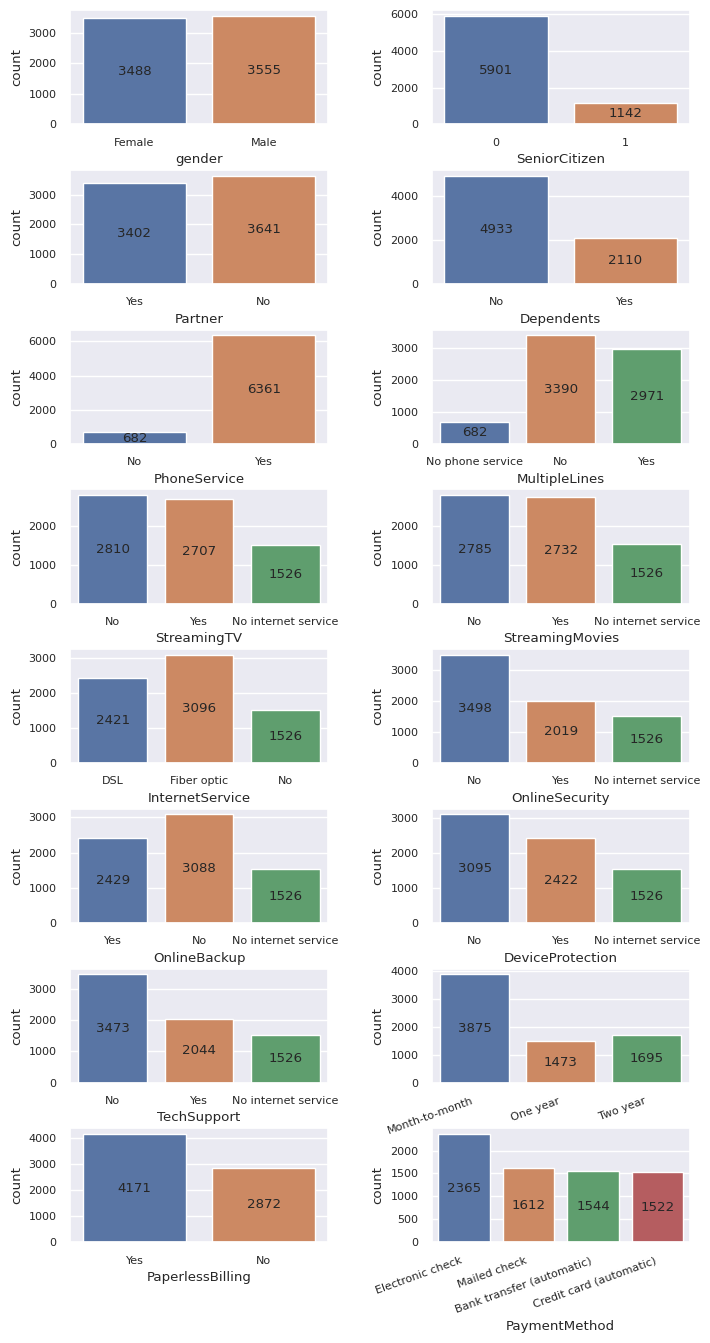

In [436]:
# Set the font scale for better readability
sns.set(font_scale=0.8)

# Create a figure with subplots
fig = plt.figure(figsize=(8, 16))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# List of categorical columns to visualize
x_ax_label_l = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines", "StreamingTV", "StreamingMovies", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "Contract", "PaperlessBilling", "PaymentMethod"]

# Loop through each categorical column and create a countplot
for i in range(1, 17):
    # Add a subplot
    ax = fig.add_subplot(8, 2, i)

    # Create a countplot for the current categorical column
    sns.countplot(x=x_ax_label_l[i-1], data=df)

    # Add labels to the bars
    ax.bar_label(ax.containers[0], label_type='center')

    # Set tick label sizes
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)

    # Rotate x-axis labels for better visibility
    if x_ax_label_l[i-1] == "Contract" or x_ax_label_l[i-1] == "PaymentMethod":
        ax.set_xticklabels(ax.get_xticklabels(), rotation=20, horizontalalignment='right')

# Show the plot
plt.show()

***Observations of Interests (Categorical Variables):***

*  *There are slightly more males than females*
*  *There significantly more non-senior citizens*
*   *There are slightly more customers who don't have a partner*
*   *There significantly more customers without dependents*
*   *Nearly all the customers have a phone service*
*   *Majority of the customers don't have multiple lines of phone service*
*   *There are slightly more customers who don't have a streaming TV than those who do, however there is a considerable group of customers who don't have internet service at all*
*   *The majority of customers have a fiber optics service provider, while DSL stands out as the second most common service provider among the customers*
*   *The majority of customers don't have online security*
*   *The majority of customers don't have online backup*
*   *The majority of customers don't have device protection*
*   *The majority of customers don't have tech support*
*   *A significant majority of the customers have a month-to-month contract, while two-year contracts stand out as the second most common contract and one-year contracts as the least popular choice*
*   *The majority of customers have paperless billing*
*   *The majority of customers use electronic checks as their payment method, with mailed checks being the second most common option, followed by automatic bank transfers in third place, and automatic credit card transactions ranking last*







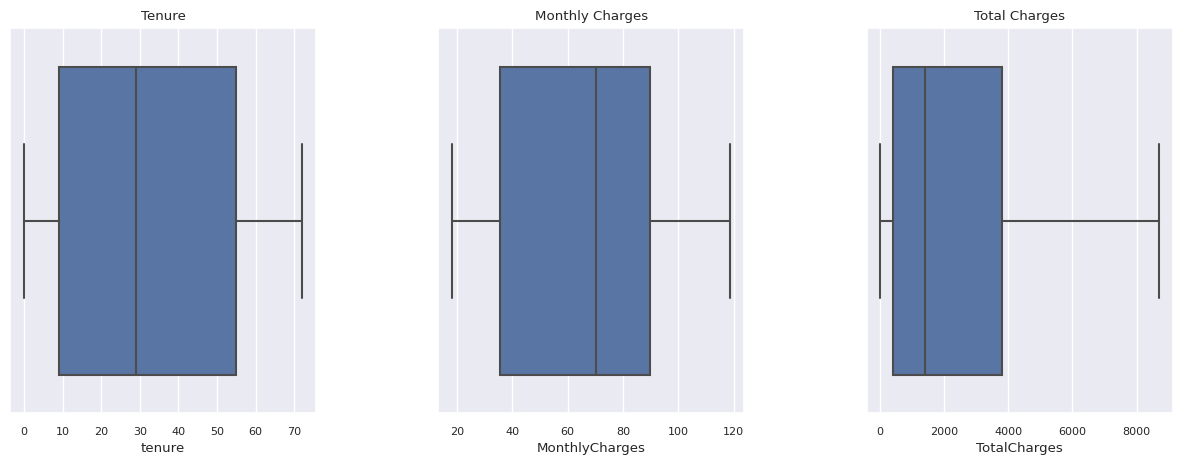

In [437]:
# Create subplots for boxplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Boxplot for tenure
ax1 = axes[0]
sns.boxplot(x=df["tenure"], ax=ax1)
ax1.set_title('Tenure')
ax1.tick_params(axis='x', labelsize=8)
ax1.tick_params(axis='y', labelsize=8)

# Boxplot for MonthlyCharges
ax2 = axes[1]
sns.boxplot(x=df["MonthlyCharges"], ax=ax2)
ax2.set_title('Monthly Charges')
ax2.tick_params(axis='x', labelsize=8)
ax2.tick_params(axis='y', labelsize=8)

# Boxplot for TotalCharges
ax3 = axes[2]
sns.boxplot(x=df["TotalCharges"], ax=ax3)
ax3.set_title('Total Charges')
ax3.tick_params(axis='x', labelsize=8)
ax3.tick_params(axis='y', labelsize=8)

# Show the plot
plt.show()

*   *The leftward position of the median in the tenure box and whisker plot indicates a negatively skewed distribution, suggesting a concentration of customers with higher tenure values and fewer with lower values*
*   *The rightward position of the median in the MonthlyCharges box and whisker plot indicates a positively skewed distribution, suggesting a concentration of customers with lower monthly charges and fewer with higher values.*
*   *The small box in the TotalCharges box and whisker plot indicates relatively low variability within the middle 50% of the data, suggesting consistency among most customers.*
*   *The rightward extension of the right whisker in the TotalCharges box indicates a presence of outliers with significantly higher total charges, contributing to a positively skewed distribution.*
*   *The leftward position of the median in the TotalCharges box suggests that the majority of customers have lower total charges, with a few customers having substantially higher values, contributing to the observed skewness.*





#### 4.2 Bivariate Analysis

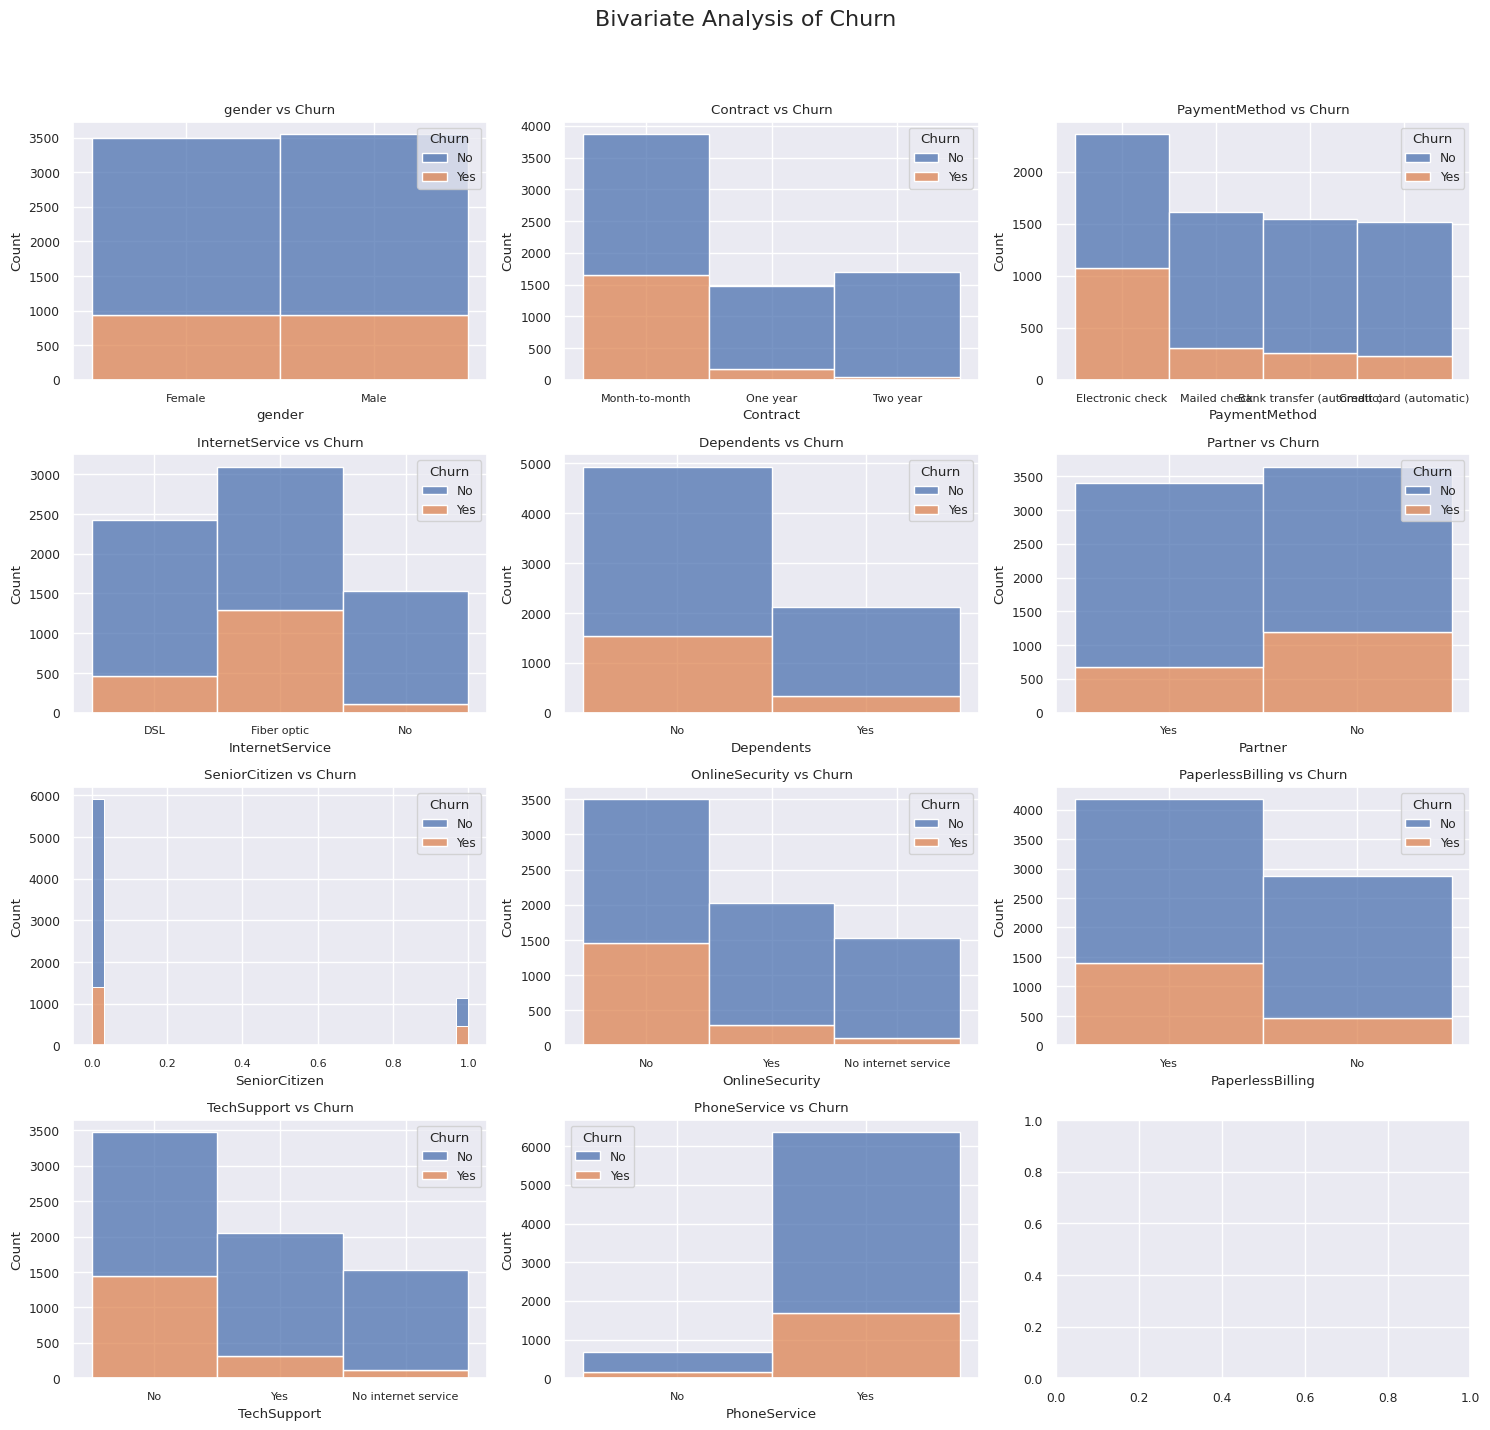

In [438]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the variables for the subplots
variables = ['gender', 'Contract', 'PaymentMethod', 'InternetService', 'Dependents', 'Partner', 'SeniorCitizen', 'OnlineSecurity', 'PaperlessBilling', 'TechSupport', 'PhoneService']

# Set up subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
fig.suptitle('Bivariate Analysis of Churn', fontsize=16)

# Flatten the axes for easy indexing
axes = axes.flatten()

# Plot histograms for each variable
for i, variable in enumerate(variables):
    sns.histplot(data=df, x=variable, hue='Churn', multiple='stack', ax=axes[i], bins=30)
    axes[i].set_title(f'{variable} vs Churn')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Count')

    # Set smaller font size for x-axis labels
    axes[i].tick_params(axis='x', labelsize=8)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()

*The code above a grid of histograms, visualizing the distribution of various categorical variables concerning customer churn at a high level*

In [439]:
# Import necessary library for interactive visualization
import plotly.express as px

In [440]:
# Create a histogram to visualize the impact of Gender on churn
fig = px.histogram(df, x='gender', color='Churn', title=f'Churn Distribution by Gender')
fig.update_layout(xaxis_title='Gender', yaxis_title='Count')
fig.show()

In [441]:
# Create a histogram to visualize the impact of Contract on churn
fig = px.histogram(df, x='Contract', color='Churn', title=f'Churn Distribution by Contract')
fig.update_layout(xaxis_title='Contract', yaxis_title='Count')
fig.show()

In [442]:
# Create a histogram to visualize the impact of PaymentMethod on churn
fig = px.histogram(df, x='PaymentMethod', color='Churn', title=f'Churn Distribution by Payment Method')
fig.update_layout(xaxis_title='Payment Method', yaxis_title='Count')
fig.show()

In [443]:
# Create a histogram to visualize the impact of InternetService on churn
fig = px.histogram(df, x='InternetService', color='Churn', title=f'Churn Distribution by Internet Service')
fig.update_layout(xaxis_title='Internet Service', yaxis_title='Count')
fig.show()

In [444]:
# Create a histogram to visualize the impact of Dependents on churn
fig = px.histogram(df, x='Dependents', color='Churn', title=f'Churn Distribution by Dependents')
fig.update_layout(xaxis_title='Dependents', yaxis_title='Count')
fig.show()

In [445]:
# Create a histogram to visualize the impact of Partner on churn
fig = px.histogram(df, x='Partner', color='Churn', title=f'Churn Distribution by Partner')
fig.update_layout(xaxis_title='Partner', yaxis_title='Count')
fig.show()

In [446]:
# Convert 'SeniorCitizen' to a categorical variable
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)

# Create a histogram to visualize the impact of SeniorCitizen on churn
fig = px.histogram(df, x='SeniorCitizen', color='Churn', title='Churn Distribution by Senior Citizen')
fig.update_layout(xaxis_title='Senior Citizen', yaxis_title='Count')
fig.show()

In [447]:
# Create a histogram to visualize the impact of OnlineSecurity on churn
fig = px.histogram(df, x='OnlineSecurity', color='Churn', title='Churn Distribution by Online Security')
fig.update_layout(xaxis_title='Online Security', yaxis_title='Count')
fig.show()

In [448]:
# Create a histogram to visualize the impact of PaperlessBilling on churn
fig = px.histogram(df, x='PaperlessBilling', color='Churn', title='Churn Distribution by Paperless Billing')
fig.update_layout(xaxis_title='Paperless Billing', yaxis_title='Count')
fig.show()

In [449]:
# Create a histogram to visualize the impact of TechSupport on churn
fig = px.histogram(df, x='TechSupport', color='Churn', title='Churn Distribution by Tech Support')
fig.update_layout(xaxis_title='Tech Support', yaxis_title='Count')
fig.show()

In [450]:
# Create a histogram to visualize the impact of PhoneService on churn
fig = px.histogram(df, x='PhoneService', color='Churn', title='Churn Distribution by Phone Service')
fig.update_layout(xaxis_title='Phone Service', yaxis_title='Count')
fig.show()

---
## Feature Engineering

4.2.0. Chi Square Test of Independence for Binary Features

In [451]:
# Convert 1 to 'Yes' and 0 to 'No' in the 'SeniorCitizen' column
df['SeniorCitizen'].replace('1', 'Yes', inplace=True)
df['SeniorCitizen'].replace('0', 'No', inplace=True)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [452]:
from scipy.stats import chi2_contingency

# Get categorical variables excluding 'customerID' and 'Churn'
variables = df.columns[df.dtypes == 'object'].drop(['customerID', 'Churn'])

# Initialize an empty list to store results
results = []

# Loop through each categorical variable
for variable in variables:
    # Create a contingency table for the variable and 'Churn'
    contingency_table = pd.crosstab(df[variable], df['Churn'])

    # Perform chi-squared test and retrieve chi2 statistic and p-value
    chi2, p_value, _, _ = chi2_contingency(contingency_table)

    # Append results to the list
    results.append({'variable': variable, 'chi square': chi2, 'p-value': p_value})

# Create a DataFrame from the results
results_df = pd.DataFrame(results)
results_df

,variable,chi square,p-value
0,gender,0.484083,4.865787e-01
1,SeniorCitizen,159.426300,1.510067e-36
2,Partner,158.733382,2.139911e-36
3,Dependents,189.129249,4.924922e-43
4,PhoneService,0.915033,3.387825e-01
5,MultipleLines,11.330441,3.464383e-03
6,InternetService,732.309590,9.571788e-160
7,OnlineSecurity,849.998968,2.661150e-185
8,OnlineBackup,601.812790,2.079759e-131
9,DeviceProtection,558.419369,5.505219e-122


*Chi-Square Test Insights on Customer Churn*

- ***Gender***: *No statistical significance with churn (p-value: 0.486).*
- ***Senior Citizen***: *Strong correlation with churn (p-value: ~0).*
- ***Partner***: *Significant association with churn (p-value: ~0).*
- ***Dependents***: *Markedly correlated with churn (p-value: ~0).*
- ***Phone Service***: *Not significantly linked to churn (p-value: 0.339).*
- ***Multiple Lines***: *Notable association with churn (p-value: 0.00346).*
- ***Internet Service***: *Highly significant correlation with churn (p-value: ~0).*
- ***Online Security, Online Backup, Device Protection, Tech Support***: *Each shows a significant link to churn (p-values: close to 0).*
- ***Streaming TV, Streaming Movies***: *Highly correlated with churn (p-values: close to 0).*
- ***Contract***: *Strong significance with churn decisions (p-value: ~0).*
- ***Paperless Billing***: *Significant link to churn (p-value: ~0).*
- ***Payment Method***: *Highly relevant to churn (p-value: ~0).*

*These results indicate that factors like age, relationship status, technology use/accessibility, contract, billing and payment type are more predictive of churn, while gender and basic phone service have little impact.*


4.2.1. Correlation

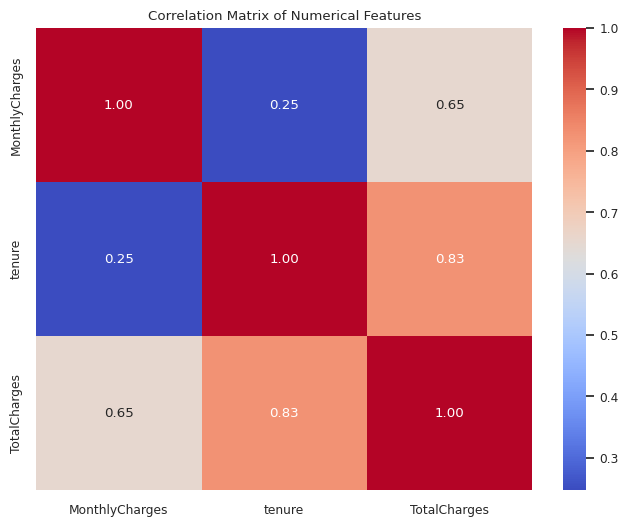

In [453]:
# Extract specific numerical columns for correlation analysis
selected_numerical_data = df[['MonthlyCharges', 'tenure', 'TotalCharges']]

# Calculate the correlation matrix
correlation_matrix = selected_numerical_data.corr()

# Set up the figure size
plt.figure(figsize=(8, 6))

# Create a heatmap of the correlation matrix with annotations and a coolwarm color map
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Display the heatmap
plt.title('Correlation Matrix of Numerical Features')
plt.show()

*A positive correlation (0.25) indicates a weak positive linear relationship between tenure and monthly charges.
Customers with longer tenure tend to have slightly higher monthly charges, but the relationship is not very strong.*

*A strong positive correlation (0.83) indicates a strong positive linear relationship between tenure and total charges.
Customers with longer tenure tend to have significantly higher total charges.*

*A positive correlation (0.65) indicates a moderate positive linear relationship between monthly charges and total charges.
Customers with higher monthly charges tend to have higher total charges, but the relationship is not as strong as tenure and total charges.*

4.2.2. One Hot Encoding

In [454]:
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

*Printing the data types in each column, we can observe that many columns contain object values, including those that appear to be numerical.*

*We create a `features_to_encode` list, which contains features that will be one-hot encoded. Features that contain binary (Yes/No) values will be excluded from the list, as well as features with numerical values in string format. customerID will be excluded from the list, as it should be kept in string format.*

In [455]:
features_to_encode = list(df.select_dtypes(include=['object']).columns)
# Features not meant to be one-hot encoded are excluded from the list
features_to_encode.remove("customerID")
features_to_encode.remove("Partner")
features_to_encode.remove("Dependents")
features_to_encode.remove("PhoneService")
features_to_encode.remove("PaperlessBilling")
features_to_encode.remove("SeniorCitizen")
features_to_encode.remove("Churn")
print(features_to_encode)

['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


In [456]:
from numpy import int64
from sklearn.preprocessing import OneHotEncoder
# Create the encoder:
encoder = OneHotEncoder(handle_unknown="error", sparse_output=False, dtype=int64)
# Apply the encoder:
df_enc = pd.DataFrame(encoder.fit_transform(df[features_to_encode]))
# Reinstate the original column names:
df_enc.columns = encoder.get_feature_names_out(features_to_encode)
df_enc.columns

Index(['gender_Female', 'gender_Male', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [457]:
df_enc.head()

,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,1,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,1,1,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,1,1,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,1,0,1,0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
4,1,0,1,0,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,1,0


*Observing the first five rows of the dataframe `df_enc`, we can observe that features in the list `features_to_encode` were successfully one-hot encoded. Therefore, we join the dataframe with the original `df` with the code below.*

In [458]:
# Concatenate with the encoded dataframe:
df = df.join(df_enc)
# Remove the original categorical features from X_train and X_test:
df.drop(columns = features_to_encode ,axis=1, inplace=True)

In [459]:
df.dtypes

customerID                                  object
SeniorCitizen                               object
Partner                                     object
Dependents                                  object
tenure                                       int64
PhoneService                                object
PaperlessBilling                            object
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                       object
gender_Female                                int64
gender_Male                                  int64
MultipleLines_No                             int64
MultipleLines_No phone service               int64
MultipleLines_Yes                            int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No                           int64
OnlineSecurity_No                            int64
OnlineSecurity_No internet serv

In [460]:
# Identify features with binary categorical values in the DataFrame
features_to_encode_bin = list(df.select_dtypes(include=['object']).columns)

# Remove 'customerID' from the list as it's not intended for binary encoding
features_to_encode_bin.remove("customerID")

# Print the list of features with binary categorical values
print(features_to_encode_bin)

['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']


In [461]:
# Create a new DataFrame 'df_enc_bin' containing only features with binary categorical values
df_enc_bin = df[features_to_encode_bin].replace(to_replace=['No', 'Yes'], value=[0, 1])

# Display the first few rows of the new DataFrame
df_enc_bin.head()

,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,0,1,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,1,1,1
3,0,0,0,0,0,0
4,0,0,0,1,1,1


In [462]:
# Remove the original categorical features from X_train and X_test:
df.drop(columns = features_to_encode_bin ,axis=1, inplace=True)
# Concatenate with the encoded dataframe:
df = df.join(df_enc_bin)

In [463]:
df.head()

,customerID,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,7590-VHVEG,1,29.85,29.85,1,0,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
1,5575-GNVDE,34,56.95,1889.50,0,1,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,3668-QPYBK,2,53.85,108.15,0,1,1,0,0,1,...,0,0,0,1,0,0,0,1,1,1
3,7795-CFOCW,45,42.30,1840.75,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
4,9237-HQITU,2,70.70,151.65,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,1,1


In [464]:
df.dtypes

customerID                                  object
tenure                                       int64
MonthlyCharges                             float64
TotalCharges                               float64
gender_Female                                int64
gender_Male                                  int64
MultipleLines_No                             int64
MultipleLines_No phone service               int64
MultipleLines_Yes                            int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No                           int64
OnlineSecurity_No                            int64
OnlineSecurity_No internet service           int64
OnlineSecurity_Yes                           int64
OnlineBackup_No                              int64
OnlineBackup_No internet service             int64
OnlineBackup_Yes                             int64
DeviceProtection_No                          int64
DeviceProtection_No internet se

In [465]:
# Print the rows in the 'TotalCharges' column where the values are missing (NaN)
print(df["TotalCharges"][df["TotalCharges"].isna()])

488    NaN
753    NaN
936    NaN
1082   NaN
1340   NaN
3331   NaN
3826   NaN
4380   NaN
5218   NaN
6670   NaN
6754   NaN
Name: TotalCharges, dtype: float64


In [466]:
# Takes the ratio of the number of NaN examples (in TotalCharges column) and finds ratio compared to entire dataset
num_cols_olddf = df.shape[0]
nan_ratio = (len(df["TotalCharges"][df["TotalCharges"].isna()].values) / num_cols_olddf) * 100
print("Ratio of examples with NaN values in TotalCharges column are: " + str(nan_ratio) + "%")

Ratio of examples with NaN values in TotalCharges column are: 0.1561834445548772%


Since the ratio of "bad" examples comapred to the number of examples in the entire dataset is less than 1 to 2%, we will drop these examples from the dataset instead of imputing these values.

In [467]:
df.dropna(inplace=True)
print("The number of dropped examples should equal 11")
print("Number of examples dropped: " + str(num_cols_olddf - df.shape[0]))

The number of dropped examples should equal 11
Number of examples dropped: 11


In [468]:
df.shape

(7032, 43)

---
## Modeling

In [469]:
pip install shap

### 1. Logistic Regression

In [470]:
import shap
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import log_loss, accuracy_score, roc_curve, auc, confusion_matrix, precision_recall_curve
from sklearn.svm import l1_min_c

In [471]:
feature_list = list(df.columns.values)
feature_list.remove("customerID")
feature_list.remove("Churn")
feature_list

['tenure',
 'MonthlyCharges',
 'TotalCharges',
 'gender_Female',
 'gender_Male',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'Ph

In [472]:
df.dtypes

customerID                                  object
tenure                                       int64
MonthlyCharges                             float64
TotalCharges                               float64
gender_Female                                int64
gender_Male                                  int64
MultipleLines_No                             int64
MultipleLines_No phone service               int64
MultipleLines_Yes                            int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No                           int64
OnlineSecurity_No                            int64
OnlineSecurity_No internet service           int64
OnlineSecurity_Yes                           int64
OnlineBackup_No                              int64
OnlineBackup_No internet service             int64
OnlineBackup_Yes                             int64
DeviceProtection_No                          int64
DeviceProtection_No internet se

In [473]:
y = df['Churn']
X = df[feature_list]
print("Number of examples: " + str(X.shape[0]))
print("Number of Features: " + str(X.shape[1]))

Number of examples: 7032
Number of Features: 41


In [474]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

In [475]:
print('X_train dim:' + str(X_train.shape))
print('X_test dim:' + str(X_test.shape))
print('y_train dim:' + str(y_train.shape))
print('y_test dim:' + str(y_test.shape))

X_train dim:(4711, 41)
X_test dim:(2321, 41)
y_train dim:(4711,)
y_test dim:(2321,)


In [476]:
def train_test_LR(X_train, y_train, X_test, y_test, c=1):
  '''
  Fit a Linear Regression classifier to the training data X_train, y_train.
  Return the loss and accuracy of resulting predictions on the test set.
  Parameters:
  C = Factor that controls how much regularization is applied to the model.
  '''
  # Create the Logistic Regression model object
  model_LR = LogisticRegression(C=c, max_iter=3000)
  # Fit the model to the training data
  model_LR.fit(X_train, y_train)
  # Make predictions on the test data
  proba_pred_LR = model_LR.predict_proba(X_test)[:,1]
  # Make predictions on the test data using the predict() method
  label_pred_LR = model_LR.predict(X_test)

  return model_LR, proba_pred_LR, label_pred_LR

In [477]:
model_LR_default, proba_pred_LR_default, label_pred_LR_default = train_test_LR(X_train, y_train, X_test, y_test, c=1)

In [478]:
pd.DataFrame(
  confusion_matrix(y_test, label_pred_LR_default, labels=[True, False]),
  columns=['Predicted: Will Churn', 'Predicted: Will Not Churn'],
  index=['Actual: Will Churn', 'Actual: Will Not Churn']
)

,Predicted: Will Churn,Predicted: Will Not Churn
Actual: Will Churn,314,284
Actual: Will Not Churn,170,1553


In [479]:
cval_l = l1_min_c(X_train, y_train, loss="log") * np.logspace(0, 7, 16)
param_grid_LR = dict(C = list(cval_l))
param_grid_LR

{'C': [2.957317881248826e-07,
  8.660932938788395e-07,
  2.536479417576631e-06,
  7.428446659569585e-06,
  2.1755279933156964e-05,
  6.371348232814065e-05,
  0.000186594143713655,
  0.0005464679247778961,
  0.0016004103176428185,
  0.00468703297793479,
  0.013726653655047962,
  0.040200489617349365,
  0.11773294541312326,
  0.3447979506614632,
  1.009790644098615,
  2.957317881248826]}

In [480]:
print('Running Grid Search...')
# Create a Logistic Regression model object
model = LogisticRegression(max_iter=3000)
# Run a grid search with 5-fold cross-validation
grid = GridSearchCV(model, param_grid_LR, cv=5)
# Fit the model on the training data
grid_search_LR = grid.fit(X_train, y_train)
print('Done')

Running Grid Search...
Done


In [481]:
best_c_LR = grid_search_LR.best_params_['C']
print("Best C value found: " + str(best_c_LR))

Best C value found: 0.3447979506614632


In [482]:
model_LR_best, proba_pred_LR_best, label_pred_LR_best = train_test_LR(X_train, y_train, X_test, y_test, c=best_c_LR)

In [483]:
pd.DataFrame(
  confusion_matrix(y_test, label_pred_LR_best, labels=[True, False]),
  columns=['Predicted: Will Churn', 'Predicted: Will Not Churn'],
  index=['Actual: Will Churn', 'Actual: Will Not Churn']
)

,Predicted: Will Churn,Predicted: Will Not Churn
Actual: Will Churn,320,278
Actual: Will Not Churn,180,1543


In [486]:
model = model_LR_best

# Define a function that takes input and returns model output
def model_predict(input_data):
    return model.predict_proba(input_data)[:, 1]  # Assuming binary classification

# Create a SHAP explainer object
explainer = shap.Explainer(model_predict, X_train)

# Calculate SHAP values for a set of samples (e.g., X_test)
shap_values = explainer.shap_values(X_test)

PermutationExplainer explainer: 2322it [01:36, 22.13it/s]                          


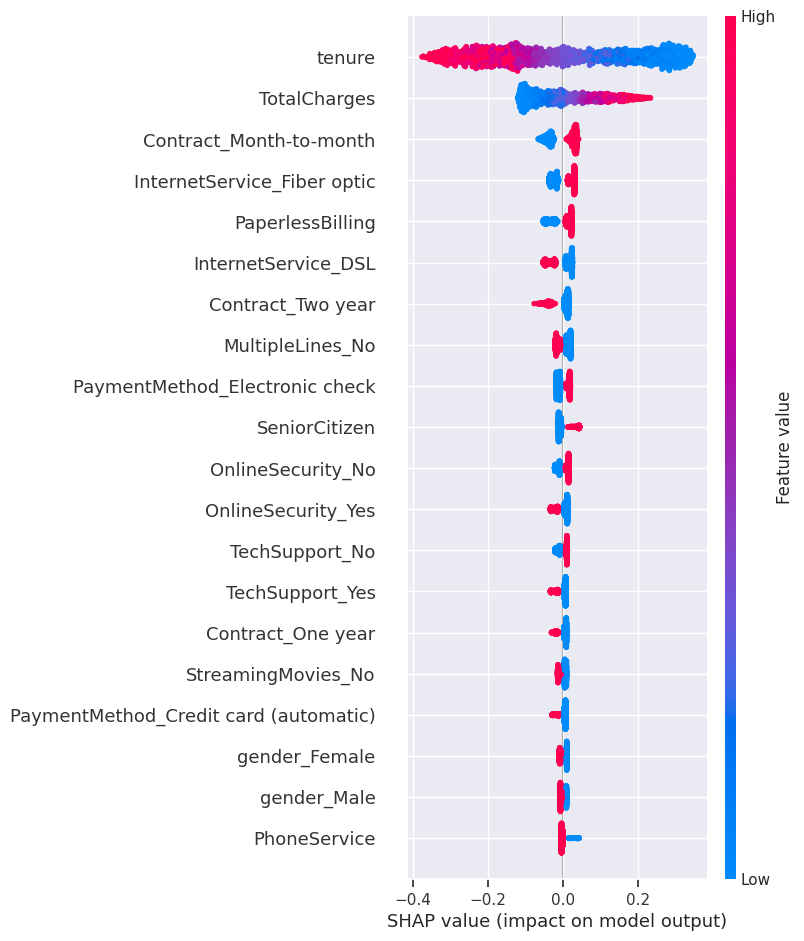

In [487]:
# Create a summary plot to visualize feature importance
shap.summary_plot(shap_values, X_test, feature_names=feature_list)

In [488]:
precision_LR_default, recall_LR_default, thresholds_LR_default = precision_recall_curve(y_test, proba_pred_LR_default)
precision_LR_best, recall_LR_best, thresholds_LR_best = precision_recall_curve(y_test, proba_pred_LR_best)

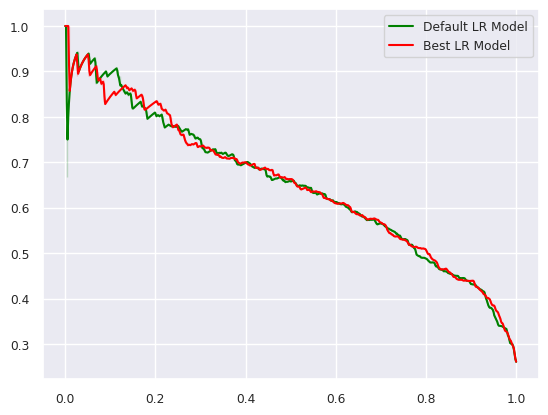

In [489]:
sns.lineplot(x=recall_LR_default, y=precision_LR_default, color="green", label="Default LR Model")
sns.lineplot(x=recall_LR_best, y=precision_LR_best, color="red", label="Best LR Model")
plt.show()

In [490]:
fpr_LR_default, tpr_LR_default, thresholds_LR_default = roc_curve(y_test, proba_pred_LR_default)
fpr_LR_best, tpr_LR_best, thresholds_LR_best = roc_curve(y_test, proba_pred_LR_best)

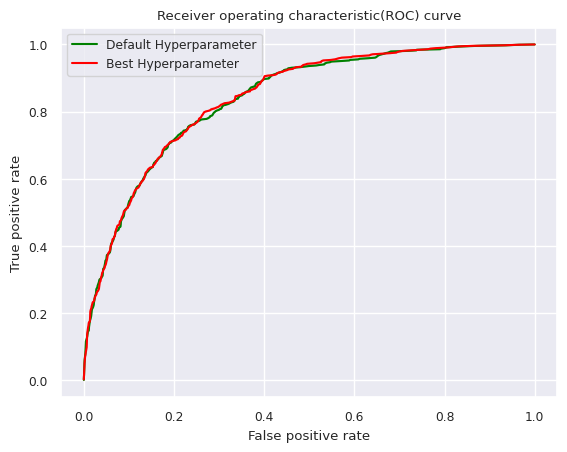

In [491]:
sns.lineplot(x=fpr_LR_default, y=tpr_LR_default, color="green", label="Default Hyperparameter")
sns.lineplot(x=fpr_LR_best, y=tpr_LR_best, color="red", label="Best Hyperparameter")
plt.title("Receiver operating characteristic(ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [492]:
auc_LR_default = auc(fpr_LR_default, tpr_LR_default)
auc_LR_best = auc(fpr_LR_best, tpr_LR_best)
print("AUC default: " + str(auc_LR_default))
print("AUC best: " + str(auc_LR_best))

AUC default: 0.8397191644813337
AUC best: 0.8419446132106054


### 3. Decision Tree Classifier

In [493]:
from sklearn.tree import DecisionTreeClassifier

In [494]:
def train_test_DT(X_train, y_train, X_test, y_test, params):
  '''
  Fit a Decision Tree classifier to the training data X_train, y_train.
  Return the model and probability predictions.
  Parameters:
  params = dictionary of parameters applied to model.
  '''
  # Create the Decision Tree model object
  model_DT = DecisionTreeClassifier(criterion=params['criterion'],
                                    max_depth=params['max_depth'],
                                    min_samples_leaf=params['min_samples_leaf'],
                                    )
  # Fit the model to the training data
  model_DT.fit(X_train, y_train)
  # Make predictions on the test data
  proba_pred_DT = list(model_DT.predict_proba(X_test)[:,1])
  # Make predictions on the test data using the predict() method
  label_pred_DT = model_DT.predict(X_test)

  return model_DT, proba_pred_DT, label_pred_DT

In [495]:
param_DT_default={'criterion':'gini',
                  'max_depth':None,
                  'min_samples_leaf':1
                  }

In [496]:
model_DT_default, proba_pred_DT_default, label_pred_DT_default = train_test_DT(X_train, y_train, X_test, y_test, param_DT_default)

In [497]:
pd.DataFrame(
  confusion_matrix(y_test, label_pred_DT_default, labels=[True, False]),
  columns=['Predicted: Will Churn', 'Predicted: Will Not Churn'],
  index=['Actual: Will Churn', 'Actual: Will Not Churn']
)

,Predicted: Will Churn,Predicted: Will Not Churn
Actual: Will Churn,280,318
Actual: Will Not Churn,311,1412


In [498]:
param_DT_grid={'criterion':['gini', 'entropy', 'log_loss'],
              'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
              'min_samples_leaf':[1,2,3]
              }

In [499]:
print('Running Grid Search...')
# Create a Decision Tree model object
model = DecisionTreeClassifier()
# Run a grid search with 3-fold cross-validation
grid = GridSearchCV(model, param_DT_grid, cv=5, scoring="accuracy", error_score="raise")
# Fit the model on the training data
grid_search_DT = grid.fit(X_train, y_train)
print('Done')

Running Grid Search...
Done


In [500]:
print('Best hyperparameters are: '+str(grid_search_DT.best_params_))
print('Best score is: '+str(grid_search_DT.best_score_))

Best hyperparameters are: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2}
Best score is: 0.7934621628132648


In [501]:
model_DT_best, proba_pred_DT_best, label_pred_DT_best = train_test_DT(X_train, y_train, X_test, y_test, grid_search_DT.best_params_)

In [502]:
pd.DataFrame(
  confusion_matrix(y_test, label_pred_DT_best, labels=[True, False]),
  columns=['Predicted: Will Churn', 'Predicted: Will Not Churn'],
  index=['Actual: Will Churn', 'Actual: Will Not Churn']
)

,Predicted: Will Churn,Predicted: Will Not Churn
Actual: Will Churn,299,299
Actual: Will Not Churn,182,1541


In [503]:
model = model_DT_best

# Define a function that takes input and returns model output
def model_predict(input_data):
    return model.predict_proba(input_data)[:, 1]  # Assuming binary classification

# Create a SHAP explainer object
explainer = shap.Explainer(model_predict, X_train)

# Calculate SHAP values for a set of samples (e.g., X_test)
shap_values = explainer.shap_values(X_test)

PermutationExplainer explainer: 2322it [00:53, 35.09it/s]                          


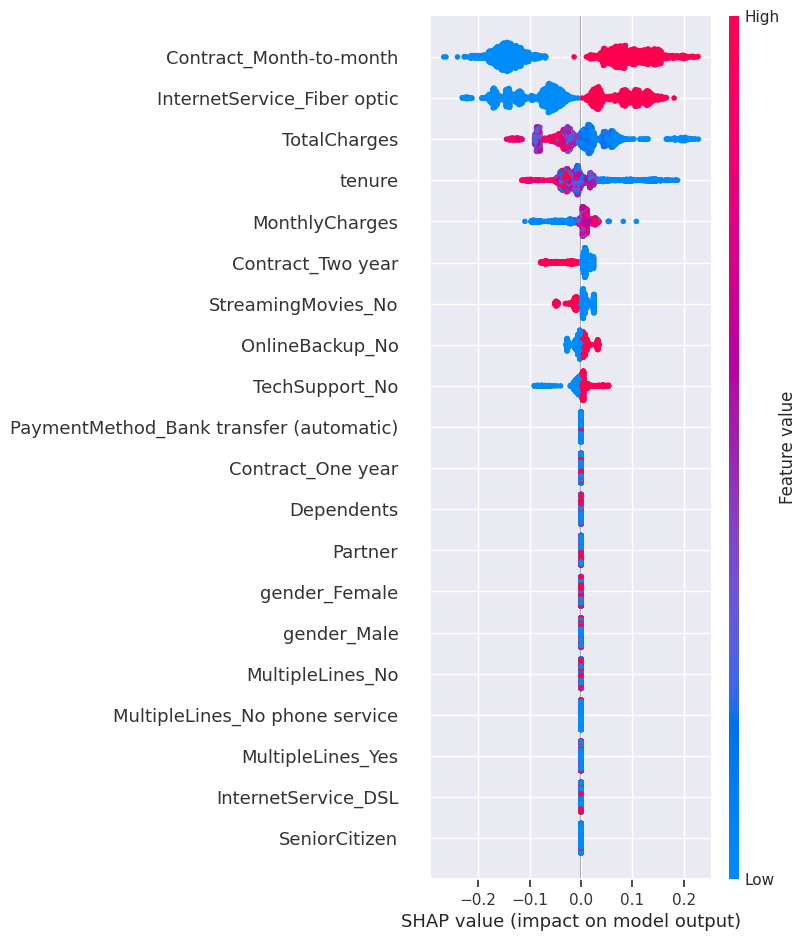

In [504]:
# Create a summary plot to visualize feature importance
shap.summary_plot(shap_values, X_test, feature_names=feature_list)

In [505]:
precision_DT_default, recall_DT_default, thresholds_DT_default = precision_recall_curve(y_test, proba_pred_DT_default)
precision_DT_best, recall_DT_best, thresholds_DT_best = precision_recall_curve(y_test, proba_pred_DT_best)

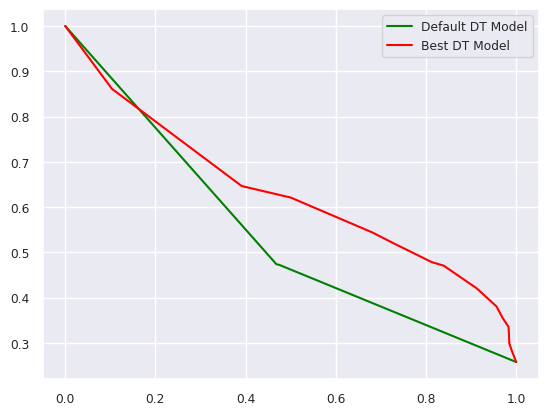

In [506]:
sns.lineplot(x=recall_DT_default, y=precision_DT_default, color="green", label="Default DT Model")
sns.lineplot(x=recall_DT_best, y=precision_DT_best, color="red", label="Best DT Model")
plt.show()

In [507]:
fpr_DT_default, tpr_DT_default, thresholds_DT_default = roc_curve(y_test, proba_pred_DT_default)
fpr_DT_best, tpr_DT_best, thresholds_DT_best = roc_curve(y_test, proba_pred_DT_best)

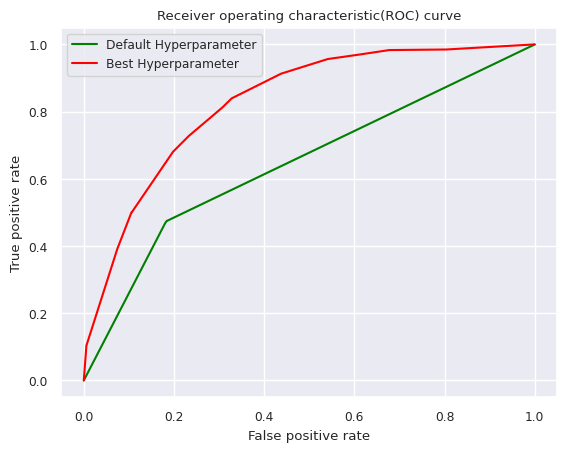

In [508]:
sns.lineplot(x=fpr_DT_default, y=tpr_DT_default, color="green", label="Default Hyperparameter")
sns.lineplot(x=fpr_DT_best, y=tpr_DT_best, color="red", label="Best Hyperparameter")
plt.title("Receiver operating characteristic(ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [509]:
auc_DT_default = auc(fpr_DT_default, tpr_DT_default)
auc_DT_best = auc(fpr_DT_best, tpr_DT_best)
print("AUC default: " + str(auc_DT_default))
print("AUC best: " + str(auc_DT_best))

AUC default: 0.6455266830623262
AUC best: 0.8287632211841756




### 4. Random Forest Classifier

In [510]:
from sklearn.ensemble import RandomForestClassifier

In [511]:
def train_test_RF(X_train, y_train, X_test, y_test, params):
  '''
  Fit a Random Forest classifier to the training data X_train, y_train.
  Return the model and probability predictions.
  Parameters:
  params = dictionary of parameters applied to model.
  '''
  # Create the Random Forest model object
  model_RF = RandomForestClassifier(criterion='entropy',
                                    n_estimators=params['n_estimators'],
                                    max_depth=params['max_depth'],
                                    max_features=params['max_features'],
                                    min_samples_leaf=params['min_samples_leaf'],
                                    min_samples_split=params['min_samples_split']
                                    )
  # Fit the model to the training data
  model_RF.fit(X_train, y_train)
  # Make predictions on the test data
  proba_pred_RF = list(model_RF.predict_proba(X_test)[:,1])
  # Make predictions on the test data using the predict() method
  label_pred_RF = model_RF.predict(X_test)

  return model_RF, proba_pred_RF, label_pred_RF

In [512]:
param_RF_default={'max_depth':None,
                  'n_estimators':100,
                  'max_features':"sqrt",
                  'min_samples_leaf':1,
                  'min_samples_split':2
                  }

In [513]:
model_RF_default, proba_pred_RF_default, label_pred_RF_default = train_test_RF(X_train, y_train, X_test, y_test, param_RF_default)

In [514]:
pd.DataFrame(
  confusion_matrix(y_test, label_pred_RF_default, labels=[True, False]),
  columns=['Predicted: Will Churn', 'Predicted: Will Not Churn'],
  index=['Actual: Will Churn', 'Actual: Will Not Churn']
)

,Predicted: Will Churn,Predicted: Will Not Churn
Actual: Will Churn,294,304
Actual: Will Not Churn,177,1546


In [515]:
param_RF_grid={'max_depth':[3,5,10],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[2,3]
              }

In [516]:
print('Running Grid Search...')
# Create a Random Forest model object
model = RandomForestClassifier()
# Run a grid search with 3-fold cross-validation
grid = GridSearchCV(model, param_RF_grid, cv=3, scoring="accuracy", error_score="raise")
# Fit the model on the training data
grid_search_RF = grid.fit(X_train, y_train)
print('Done')

Running Grid Search...
Done


In [517]:
print('Best hyperparameters are: '+str(grid_search_RF.best_params_))
print('Best score is: '+str(grid_search_RF.best_score_))

Best hyperparameters are: {'max_depth': 5, 'max_features': 7, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 200}
Best score is: 0.8011053584001968


In [518]:
model_RF_best, proba_pred_RF_best, label_pred_RF_best = train_test_RF(X_train, y_train, X_test, y_test, grid_search_RF.best_params_)

In [519]:
pd.DataFrame(
  confusion_matrix(y_test, label_pred_RF_best, labels=[True, False]),
  columns=['Predicted: Will Churn', 'Predicted: Will Not Churn'],
  index=['Actual: Will Churn', 'Actual: Will Not Churn']
)

,Predicted: Will Churn,Predicted: Will Not Churn
Actual: Will Churn,270,328
Actual: Will Not Churn,143,1580


In [520]:
model = model_RF_best

# Define a function that takes input and returns model output
def model_predict(input_data):
    return model.predict_proba(input_data)[:, 1]  # Assuming binary classification

# Create a SHAP explainer object
explainer = shap.Explainer(model_predict, X_train)

# Calculate SHAP values for a set of samples (e.g., X_test)
shap_values = explainer.shap_values(X_test)

PermutationExplainer explainer: 2322it [14:58,  2.55it/s]


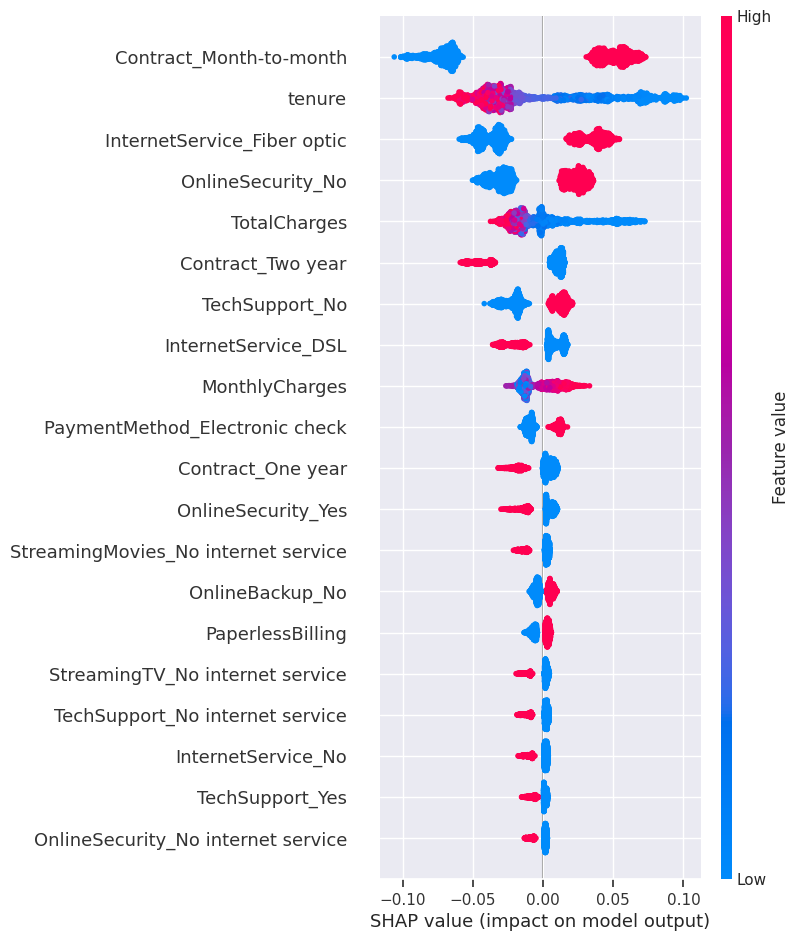

In [521]:
# Create a summary plot to visualize feature importance
shap.summary_plot(shap_values, X_test, feature_names=feature_list)

In [522]:
precision_RF_default, recall_RF_default, thresholds_RF_default = precision_recall_curve(y_test, proba_pred_RF_default)
precision_RF_best, recall_RF_best, thresholds_RF_best = precision_recall_curve(y_test, proba_pred_RF_best)

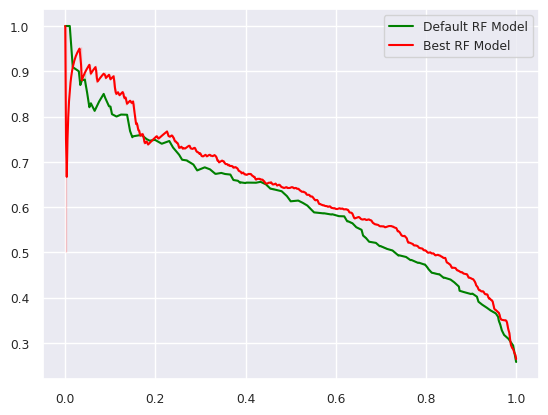

In [523]:
sns.lineplot(x=recall_RF_default, y=precision_RF_default, color="green", label="Default RF Model")
sns.lineplot(x=recall_RF_best, y=precision_RF_best, color="red", label="Best RF Model")
plt.show()

In [524]:
fpr_RF_default, tpr_RF_default, thresholds_RF_default = roc_curve(y_test, proba_pred_RF_default)
fpr_RF_best, tpr_RF_best, thresholds_RF_best = roc_curve(y_test, proba_pred_RF_best)

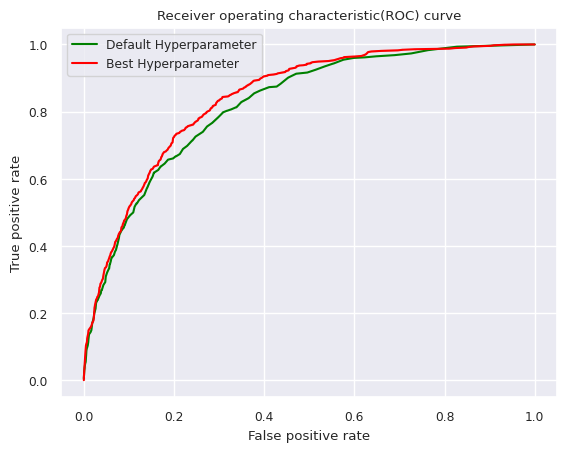

In [525]:
sns.lineplot(x=fpr_RF_default, y=tpr_RF_default, color="green", label="Default Hyperparameter")
sns.lineplot(x=fpr_RF_best, y=tpr_RF_best, color="red", label="Best Hyperparameter")
plt.title("Receiver operating characteristic(ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [526]:
auc_RF_default = auc(fpr_RF_default, tpr_RF_default)
auc_RF_best = auc(fpr_RF_best, tpr_RF_best)
print("AUC default: " + str(auc_RF_default))
print("AUC best: " + str(auc_RF_best))

AUC default: 0.821421084404001
AUC best: 0.8412273839864746


### 5. XGBoost Model

In [527]:
!pip install xgboost
import xgboost as xgb

In [528]:
def train_test_XGB(X_train, y_train, X_test, y_test, params):
    """
    Fit an XGBoost classifier to the training data X_train, y_train.
    Return the model and probability predictions.

    Parameters:
    - params: Dictionary containing hyperparameters for XGBoost.
    """
    model_xgb = xgb.XGBClassifier(**params)
    model_xgb.fit(X_train, y_train)

    proba_pred_xgb = model_xgb.predict_proba(X_test)[:, 1]
    label_pred_xgb = model_xgb.predict(X_test)

    return model_xgb, proba_pred_xgb, label_pred_xgb

In [529]:
param_xgb_default = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

model_xgb_default, proba_pred_xgb_default, label_pred_xgb_default = train_test_XGB(X_train, y_train, X_test, y_test, param_xgb_default)

In [533]:
pd.DataFrame(
  confusion_matrix(y_test, label_pred_xgb_default, labels=[True, False]),
  columns=['Predicted: Will Churn', 'Predicted: Will Not Churn'],
  index=['Actual: Will Churn', 'Actual: Will Not Churn']
)

,Predicted: Will Churn,Predicted: Will Not Churn
Actual: Will Churn,315,283
Actual: Will Not Churn,202,1521


In [530]:
param_xgb_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'n_estimators': [100, 200, 300]
}

In [531]:
print('Running Grid Search...')
grid_xgb = GridSearchCV(xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss'), param_xgb_grid, cv=3, scoring="accuracy", error_score="raise")
grid_search_xgb = grid_xgb.fit(X_train, y_train)
print('Done')

Running Grid Search...
Done


In [532]:
print('Best hyperparameters for XGBoost are: ' + str(grid_search_xgb.best_params_))
print('Best score for XGBoost is: ' + str(grid_search_xgb.best_score_))

best_params_xgb = grid_search_xgb.best_params_
model_xgb_best, proba_pred_xgb_best, label_pred_xgb_best = train_test_XGB(X_train, y_train, X_test, y_test, best_params_xgb)

Best hyperparameters for XGBoost are: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 300, 'subsample': 0.7}
Best score for XGBoost is: 0.8042896663382622


In [534]:
pd.DataFrame(
  confusion_matrix(y_test, label_pred_xgb_best, labels=[True, False]),
  columns=['Predicted: Will Churn', 'Predicted: Will Not Churn'],
  index=['Actual: Will Churn', 'Actual: Will Not Churn']
)

,Predicted: Will Churn,Predicted: Will Not Churn
Actual: Will Churn,285,313
Actual: Will Not Churn,149,1574


In [535]:
model = model_xgb_best

# Define a function that takes input and returns model output
def model_predict(input_data):
    return model.predict_proba(input_data)[:, 1]  # Assuming binary classification

# Create a SHAP explainer object
explainer = shap.Explainer(model_predict, X_train)

# Calculate SHAP values for a set of samples (e.g., X_test)
shap_values = explainer.shap_values(X_test)

PermutationExplainer explainer: 2322it [04:18,  8.85it/s]


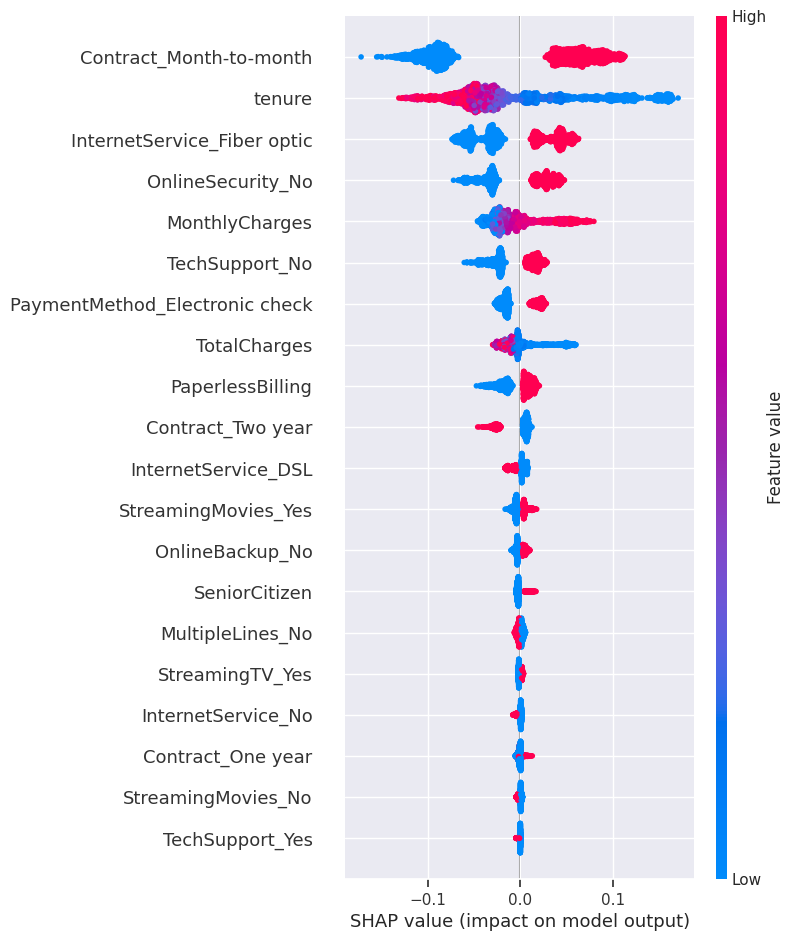

In [536]:
# Create a summary plot to visualize feature importance
shap.summary_plot(shap_values, X_test, feature_names=feature_list)

In [540]:
precision_xgb_default, recall_xgb_default, thresholds_xgb_default = precision_recall_curve(y_test, proba_pred_xgb_default)
precision_xgb_best, recall_xgb_best, thresholds_xgb_best = precision_recall_curve(y_test, proba_pred_xgb_best)

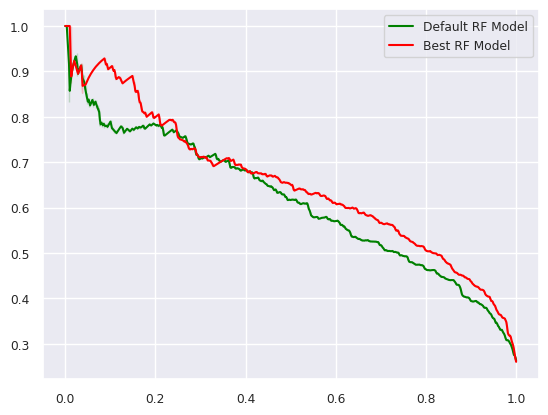

In [542]:
sns.lineplot(x=recall_xgb_default, y=precision_xgb_default, color="green", label="Default RF Model")
sns.lineplot(x=recall_xgb_best, y=precision_xgb_best, color="red", label="Best RF Model")
plt.show()

In [543]:
fpr_xgb_default, tpr_xgb_default, thresholds_xgb_default = roc_curve(y_test, proba_pred_xgb_default)
fpr_xgb_best, tpr_xgb_best, thresholds_xgb_best = roc_curve(y_test, proba_pred_xgb_best)

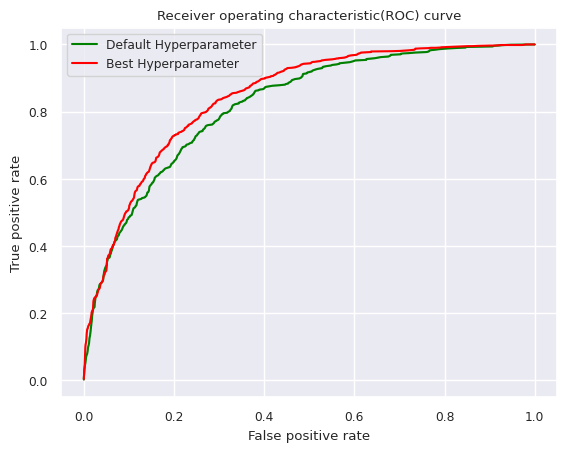

In [544]:
sns.lineplot(x=fpr_xgb_default, y=tpr_xgb_default, color="green", label="Default Hyperparameter")
sns.lineplot(x=fpr_xgb_best, y=tpr_xgb_best, color="red", label="Best Hyperparameter")
plt.title("Receiver operating characteristic(ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [545]:
auc_xgb_default = auc(fpr_xgb_default, tpr_xgb_default)
auc_xgb_best = auc(fpr_xgb_best, tpr_xgb_best)
print("AUC default: " + str(auc_xgb_default))
print("AUC best: " + str(auc_xgb_best))

AUC default: 0.8203132127404755
AUC best: 0.844723755136584
